In [8]:
import locale
import shutil
import cv2
from ultralytics import YOLO
from IPython.display import display, Image
from datetime import datetime
import os

In [2]:
locale.setlocale(locale.LC_ALL, "en_US.UTF-8")

'en_US.UTF-8'

In [3]:
def detect_fire(image_path, model_path='fire_nonfire_best.pt', output_dir='runs/detect/predict/'):
    if not os.path.exists(output_dir):
        os.makedirs(output_dir, exist_ok=True)
    
    model = YOLO(model_path)
    
    results = model.predict(source=image_path, conf=0.5, save=True, project=output_dir)
    
    result_folder = results[0].save_dir 
    return result_folder, results


image 1/1 /home/oradev/Downloads/Compressed/archive/fire_dataset/non_fire_images/non_fire.73.png: 448x640 1 non_fire, 169.5ms
Speed: 3.3ms preprocess, 169.5ms inference, 0.9ms postprocess per image at shape (1, 3, 448, 640)
Results saved to runs/detect/predict/predict4


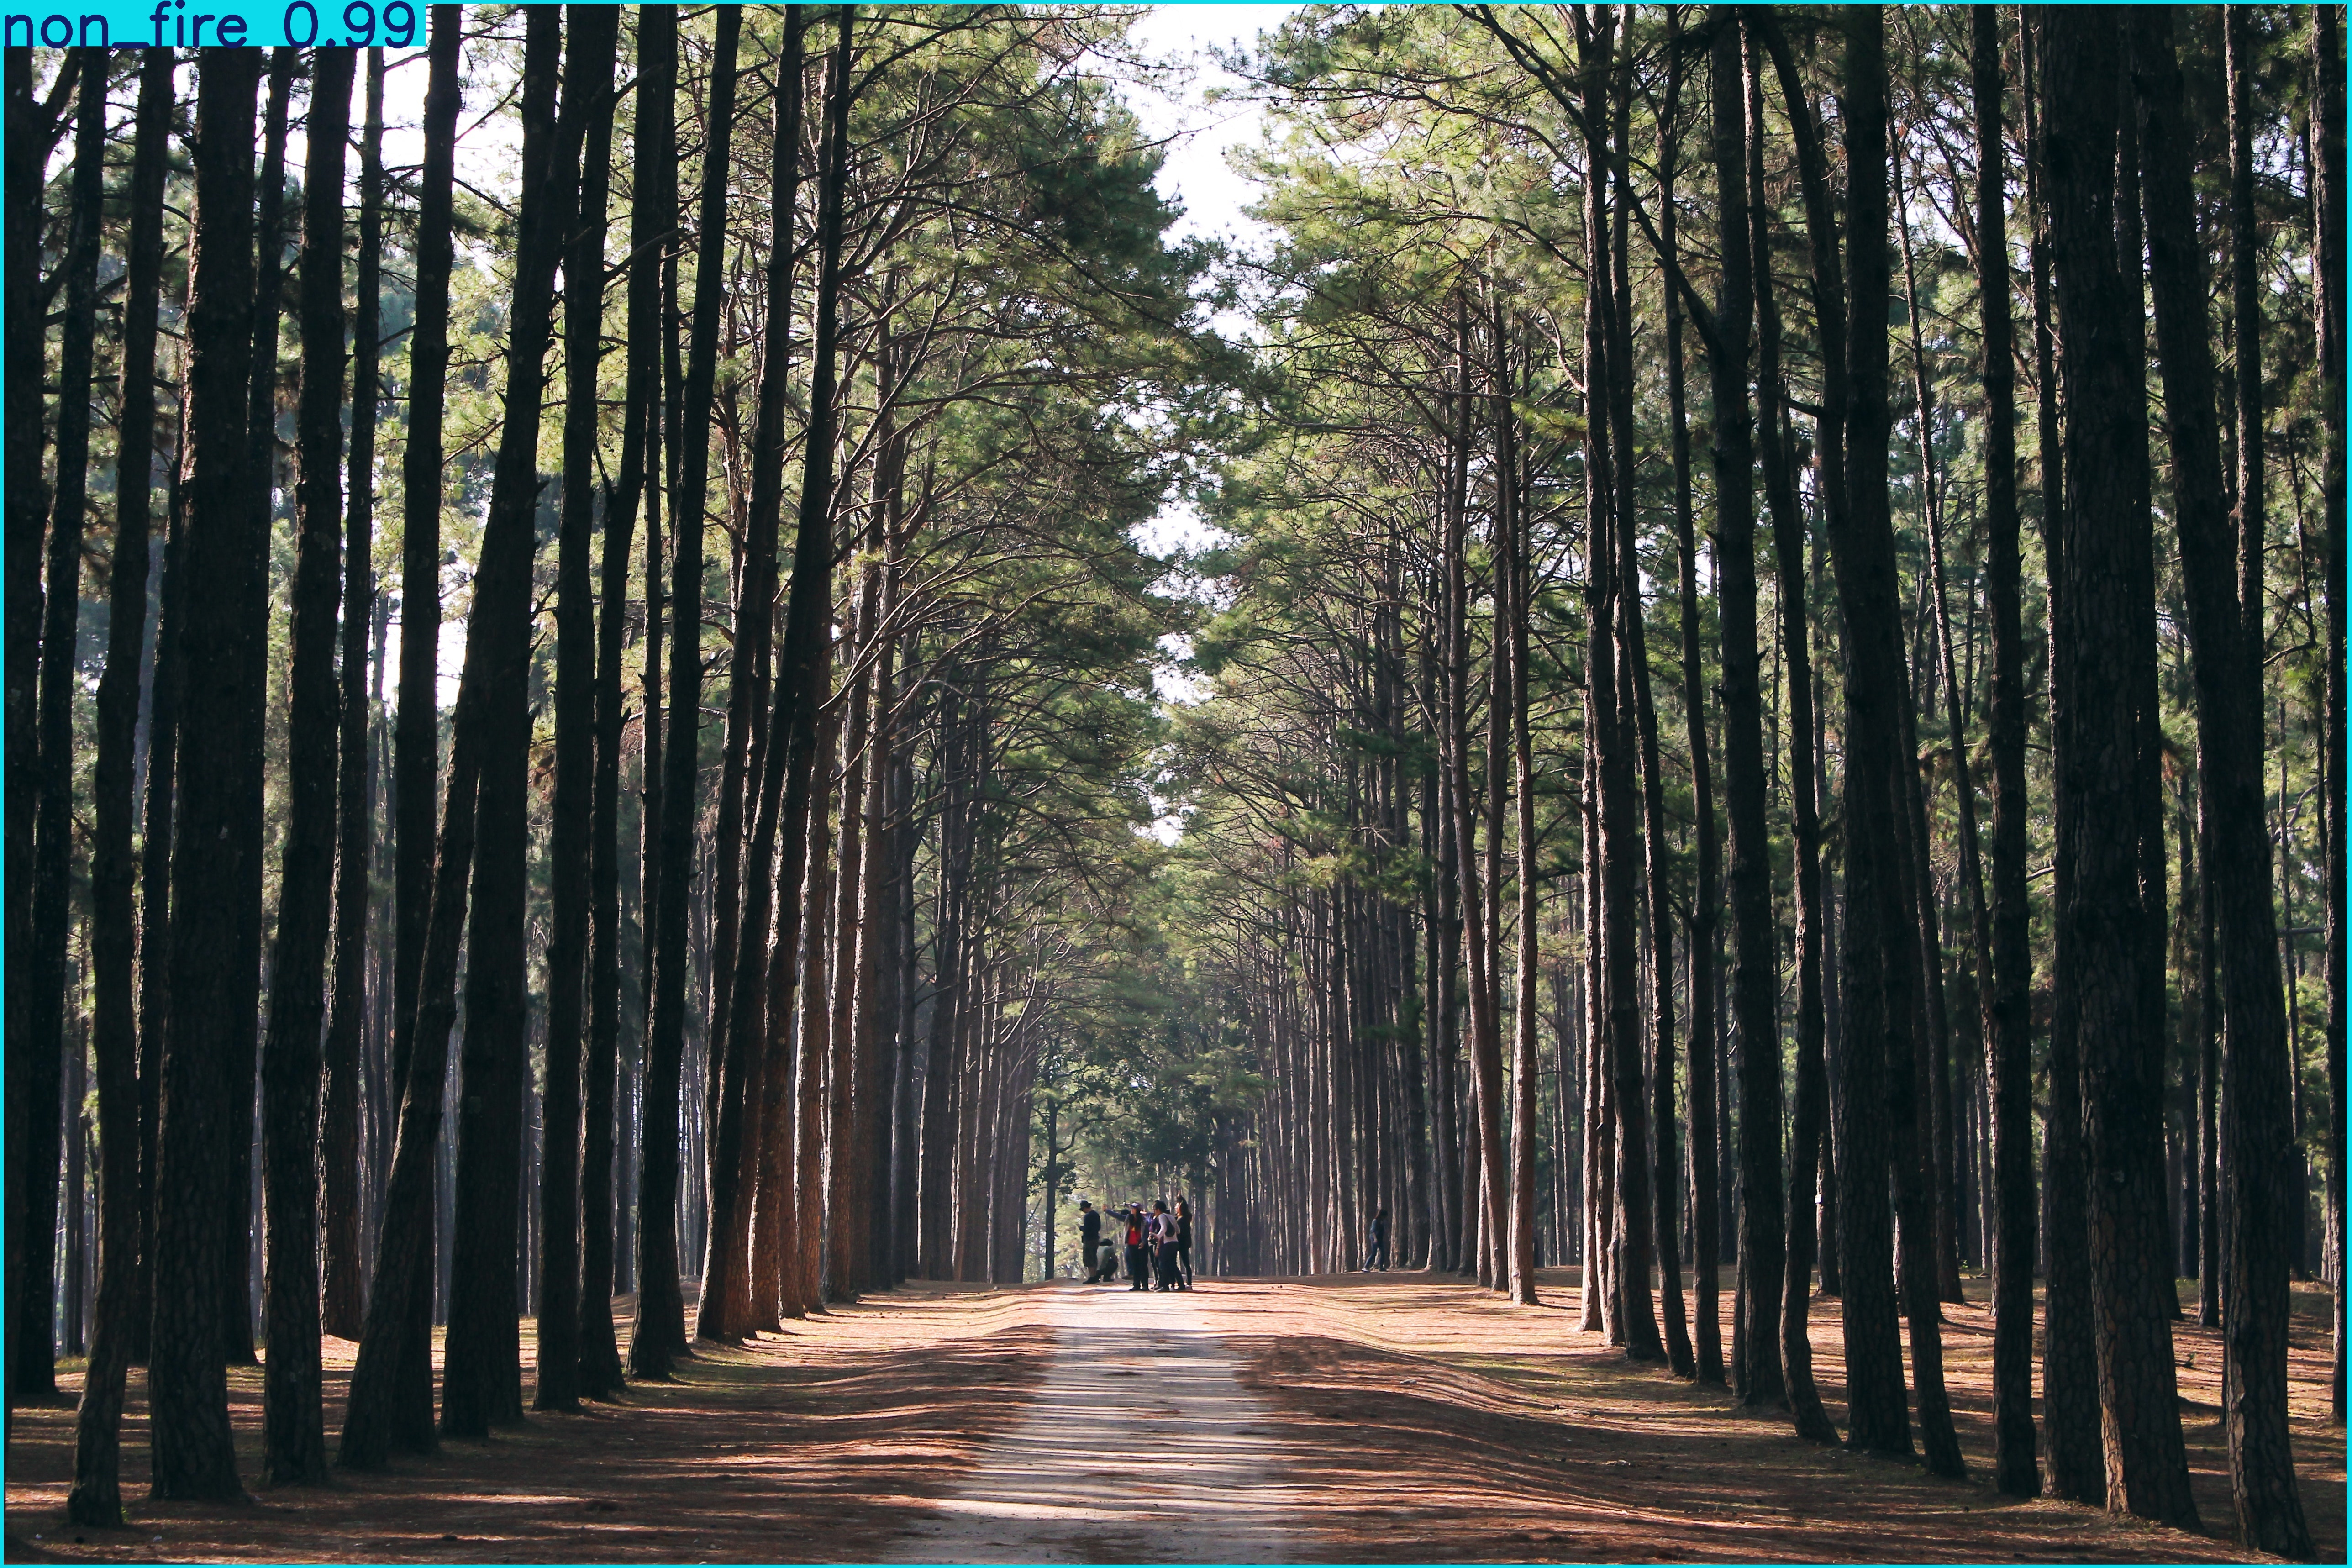

In [7]:
image_path = "/home/oradev/Downloads/Compressed/archive/fire_dataset/non_fire_images/non_fire.73.png"
# image_path = "/home/oradev/Downloads/Compressed/archive/fire_dataset/fire_images/fire.13.png"
model_path = "./fire_nonfire_best.pt"


output_dir = 'runs/detect/predict/'
result_folder, results = detect_fire(image_path, model_path, output_dir)


predicted_image_path = os.path.join(result_folder, image_path.split('/')[-1])


if os.path.exists(predicted_image_path):
    display(Image(filename=predicted_image_path))  
else:
    predicted_image_path_jpg = predicted_image_path.replace('.png', '.jpg')
    if os.path.exists(predicted_image_path_jpg):
        display(Image(filename=predicted_image_path_jpg))
    else:
        print("No image found with the given filename!")

In [13]:
def detect_fire_on_video(video_path, model_path='best.pt', output_dir='runs/detect/predict/'):
    # Check if the output directory exists, create if not
    if not os.path.exists(output_dir):
        os.makedirs(output_dir, exist_ok=True)
    
    # Load the model
    model = YOLO(model_path)
    
    # Open the video file
    cap = cv2.VideoCapture(video_path)
    
    # Get the video details
    frame_rate = cap.get(cv2.CAP_PROP_FPS)
    frame_width = int(cap.get(cv2.CAP_PROP_FRAME_WIDTH))
    frame_height = int(cap.get(cv2.CAP_PROP_FRAME_HEIGHT))
    
    # Create a VideoWriter object to save the output video (optional)
    output_video_path = os.path.join(output_dir, 'output_video.avi')
    out = cv2.VideoWriter(output_video_path, cv2.VideoWriter_fourcc(*'XVID'), frame_rate, (frame_width, frame_height))
    
    frame_count = 0
    result_folder = os.path.join(output_dir, "video_results")
    os.makedirs(result_folder, exist_ok=True)
    
    while cap.isOpened():
        ret, frame = cap.read()
        if not ret:
            break
        
        # Perform prediction on the frame
        results = model.predict(source=frame, conf=0.5, save=True, project=result_folder)
        
        # Check if any fire is detected in the results
        fire_detected = any(cls == 0 for cls in results[0].boxes.cls)  # Class 0 is for fire, adjust if needed
        
        # Display message on the frame
        detection_text = "Fire Detected" if fire_detected else "No Fire Detected"
        cv2.putText(frame, detection_text, (50, 50), cv2.FONT_HERSHEY_SIMPLEX, 1, (0, 0, 255), 2, cv2.LINE_AA)
        
        # Save the frame with detection text
        out.write(frame)
        
        # Display the frame with detection status
        cv2.imshow("Fire Detection", frame)
        
        # Optional: exit the loop if 'q' is pressed
        if cv2.waitKey(1) & 0xFF == ord('q'):
            break
        
        frame_count += 1
    
    cap.release()
    out.release()
    cv2.destroyAllWindows()

    return result_folder, output_video_path

In [14]:
video_path = "/home/oradev/Downloads/vecteezy_fire-torch-burning_9658131.mp4"  # Path to your video
model_path = "./fire_nonfire_best.pt"
output_dir = 'runs/detect/predict/'

# Detect fire in the video
result_folder, output_video_path = detect_fire_on_video(video_path, model_path, output_dir)

# To display the result video path
print(f"Results saved to: {output_video_path}")


0: 384x640 1 fire, 1 non_fire, 163.6ms
Speed: 4.6ms preprocess, 163.6ms inference, 1.0ms postprocess per image at shape (1, 3, 384, 640)
Results saved to runs/detect/predict/video_results/predict2



0: 384x640 1 fire, 1 non_fire, 336.9ms
Speed: 7.8ms preprocess, 336.9ms inference, 1.0ms postprocess per image at shape (1, 3, 384, 640)
Results saved to runs/detect/predict/video_results/predict3

0: 384x640 1 fire, 1 non_fire, 190.2ms
Speed: 6.9ms preprocess, 190.2ms inference, 1.0ms postprocess per image at shape (1, 3, 384, 640)
Results saved to runs/detect/predict/video_results/predict4

0: 384x640 1 fire, 1 non_fire, 204.8ms
Speed: 4.8ms preprocess, 204.8ms inference, 1.1ms postprocess per image at shape (1, 3, 384, 640)
Results saved to runs/detect/predict/video_results/predict5

0: 384x640 1 non_fire, 164.5ms
Speed: 6.2ms preprocess, 164.5ms inference, 1.0ms postprocess per image at shape (1, 3, 384, 640)
Results saved to runs/detect/predict/video_results/predict6

0: 384x640 1 fire, 1 non_fire, 177.0ms
Speed: 6.9ms preprocess, 177.0ms inference, 0.9ms postprocess per image at shape (1, 3, 384, 640)
Results saved to runs/detect/predict/video_results/predict7

0: 384x640 1 fire

KeyboardInterrupt: 